In [2]:

from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
import seaborn as sns
from scipy import stats
import matplotlib.mlab as mlab
import os
from scipy.stats import norm
from scipy.optimize import curve_fit

from astropy.wcs import WCS



from astropy.stats import sigma_clip
%matplotlib inline
sns.set()


plt.rcParams['figure.figsize'] = [15, 10]

In [3]:
def array(name,x,y,a,b):
    filelist = glob(name)
    
    #set empty arrays to be filled
    mean_array = []
    std_array = []
    temp_array = []
    exp_array = []
    
    #goes through each image and gets the information
    for file in filelist:
        image = fits.open(file)
        
        mean = ((image[0].data[x:y,a:b]).astype(float)).mean()
        mean_array.append(mean)
        
        std = ((image[0].data[x:y,a:b]).astype(float)).std()
        std_array.append(std)
        
        temperature = image[0].header['CCD-TEMP']
        temp_array.append(temperature)
        
        time = image[0].header['EXPTIME']
        exp_array.append (time)
        
        
    return mean_array, std_array, temp_array, exp_array

In [4]:

def master(name):
    lis = glob(name)
    dat = []
    for file in lis:
        image = fits.open(file)
        dat.append(image[0].data)

    return np.average(dat, axis=0)

def sigmaclip(name): 
    
    i = 0 
    data = []
    lis = glob(name)
    while i < len(lis):
        
        pdat = fits.open(lis[i])[0].data

        
        
        data.append(pdat)
        
        i += 1
    newdat = data
    master = np.mean(newdat, axis = 0)
    

    return master
    

In [5]:
os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/AstroCCDimage/data_2019/data_2019/M91/bias')
m = master('B130311*')
masterbias = np.delete(m,np.s_[0:50],axis = 1)

In [6]:
#writing files to computer
hdu = fits.PrimaryHDU(masterbias)
hdul = fits.HDUList([hdu])
hdul.writeto('masterbias.fits', overwrite = True)

In [7]:
#creating new fits files and saving them for the bias subtracted flat images
def biassubflat(name):
    
    i = 0 
    
    lis = glob(name)
    while i < len(lis):
        
        f = fits.open(lis[i])[0].data
        flat = np.delete(f,np.s_[0:50],axis = 1)
        bias = masterbias
        sub = flat -bias
        
        #writing the new files
       
        name = 'bflat_0{}'.format(i+1)
        
        hdu = fits.PrimaryHDU(sub)
        hdul = fits.HDUList([hdu])
        hdul.writeto(name+'.fits', overwrite = True)
        i += 1
    
    
    return 

In [8]:
#saving all images for each filter 

os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/AstroCCDimage/data_2019/data_2019/M91/flats/B')
biassubflat('F130311*')

In [9]:
os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/AstroCCDimage/data_2019/data_2019/M91/flats/Halpha_NII')
biassubflat('F130311*')

In [10]:
os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/AstroCCDimage/data_2019/data_2019/M91/flats/V')
biassubflat('F130311*')

In [11]:
#creating master flat for B filter
os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/AstroCCDimage/data_2019/data_2019/M91/flats/B')
masterflatB = master('bflat*')
hdu2 = fits.PrimaryHDU(masterflatB)
hdu3 = fits.HDUList([hdu2])
hdu3.writeto('masterflatB.fits', overwrite = True)

In [12]:
#masterflat for H filter
os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/AstroCCDimage/data_2019/data_2019/M91/flats/Halpha_NII')
masterflatHalpha = master('bflat*')
hdu4 = fits.PrimaryHDU(masterflatHalpha)
hdu5 = fits.HDUList([hdu4])
hdu5.writeto('masterflatHalpha.fits', overwrite = True)

In [13]:
#master flat for V filter
os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/AstroCCDimage/data_2019/data_2019/M91/flats/V')
masterflatV = master('bflat*')
hdu6 = fits.PrimaryHDU(masterflatV)
hdu7 = fits.HDUList([hdu6])
hdu7.writeto('masterflatV.fits', overwrite = True)

In [14]:
#normalising about central 100 x 100 pixel region
os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/AstroCCDimage/data_2019/data_2019/M91/flats/B')
mfb = fits.open('masterflatB.fits')
master= (mfb[0].data[451:550,651:750]).astype(float)
av = np.mean(master)
nmasterflatB = ((mfb[0].data[0:2048,0:2098]).astype(float))/(av)
print(np.average(nmasterflatB))
hdun = fits.PrimaryHDU(nmasterflatB)
hdun1 = fits.HDUList([hdun])
hdun1.writeto('nmasterflatB.fits', overwrite = True)

0.9961188248305513


In [15]:
os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/AstroCCDimage/data_2019/data_2019/M91/flats/Halpha_NII')
mfHa = fits.open('masterflatHalpha.fits')
master1= (mfHa[0].data[451:550,651:750]).astype(float)
av1 = np.mean(master1)
nmasterflatHa = ((mfHa[0].data[0:2048,0:2098]).astype(float))/(av1)
print(np.mean(nmasterflatHa))
hdun2 = fits.PrimaryHDU(nmasterflatHa)
hdun3 = fits.HDUList([hdun2])
hdun3.writeto('nmasterflatHa.fits', overwrite = True)

0.9931608328099156


In [16]:
os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/AstroCCDimage/data_2019/data_2019/M91/flats/V')
mfV= fits.open('masterflatV.fits')
master2= (mfHa[0].data[451:550,651:750]).astype(float)
av2 = np.mean(master2)

nmasterflatV= ((mfV[0].data[0:2048,0:2098]).astype(float))/(av2-2000)

print(np.mean(nmasterflatV))
hdun4 = fits.PrimaryHDU(nmasterflatV)
hdun5 = fits.HDUList([hdun4])
hdun5.writeto('nmasterflatV.fits', overwrite = True)

0.9840798295616002


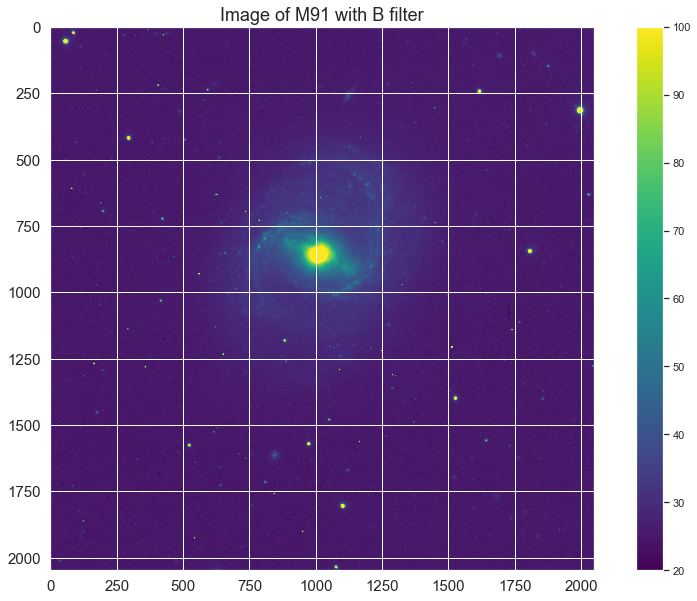

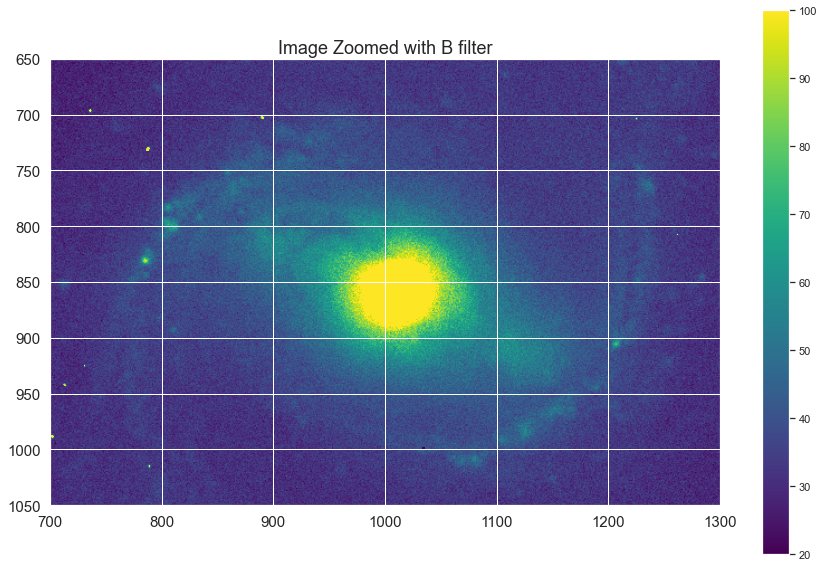

In [17]:
#creating full image of M91 B filter
os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/AstroCCDimage/data_2019/data_2019/M91/object/B')

f = sigmaclip('O130311*')
flat = np.delete(f,np.s_[0:50],axis = 1)
imageB = (flat - masterbias)/nmasterflatB

plt.imshow(imageB,vmax = 100, vmin= 20, cmap = 'viridis')
plt.title('Image of M91 with B filter', fontsize = 18)
plt.tick_params(labelsize=15)

plt.colorbar()
os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/AstroCCDimage/images')
plt.savefig('imageB.png')
plt.show()


plt.imshow(imageB, vmax = 100, vmin = 20 ,cmap = 'viridis')
plt.title('Image Zoomed with B filter', fontsize = 18)
plt.xlim(700,1300)
plt.ylim(1050,650)
plt.tick_params(labelsize=15)
plt.colorbar()

plt.savefig('imageBzoom.png')
plt.show()
# plt.show()
os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/AstroCCDimage/data_2019/data_2019/M91/object/B')
hdunB = fits.PrimaryHDU(imageB)
hdunBB = fits.HDUList([hdunB])
hdunBB.writeto('imageB.fits', overwrite = True)


20.505680613213485


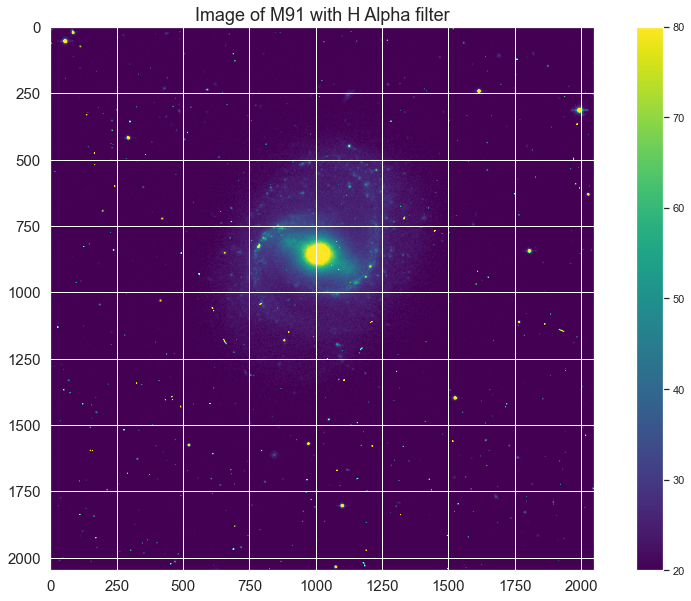

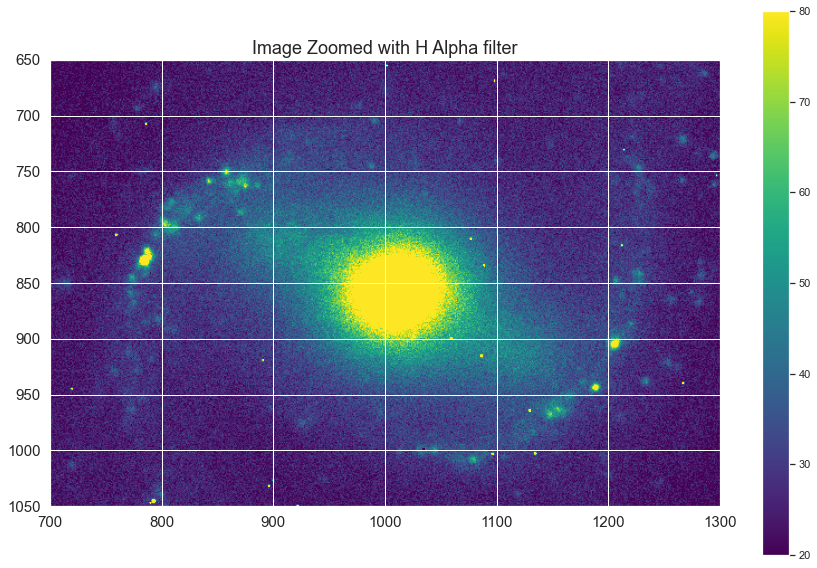

In [18]:
#full image of M91 using H aplha filter
os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/AstroCCDimage/data_2019/data_2019/M91/object/Halpha_NII')

fH = sigmaclip('O130311*')
flatH = np.delete(fH, np.s_[0:50],axis = 1)
imageHalpha = (flatH - masterbias)/nmasterflatHa


print(np.average(imageHalpha))
plt.imshow(imageHalpha,vmax = 80, vmin = 20, cmap = 'viridis')
plt.title('Image of M91 with H Alpha filter', fontsize = 18)
plt.tick_params(labelsize=15)
plt.colorbar()
os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/AstroCCDimage/images')
plt.savefig('imageHalpha.png')
plt.show()

plt.imshow(imageHalpha, vmax = 80, vmin = 20 ,cmap = 'viridis')
plt.title('Image Zoomed with H Alpha filter', fontsize = 18)
plt.xlim(700,1300)
plt.ylim(1050,650)
plt.tick_params(labelsize=15)
plt.colorbar()

plt.savefig('imageHalaphazoom.png')

plt.show()
os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/AstroCCDimage/data_2019/data_2019/M91/object/Halpha_NII')
hdunH = fits.PrimaryHDU(imageHalpha)
hdunHa = fits.HDUList([hdunH])
hdunHa.writeto('imageHalpha.fits', overwrite = True)

207.7901647968131


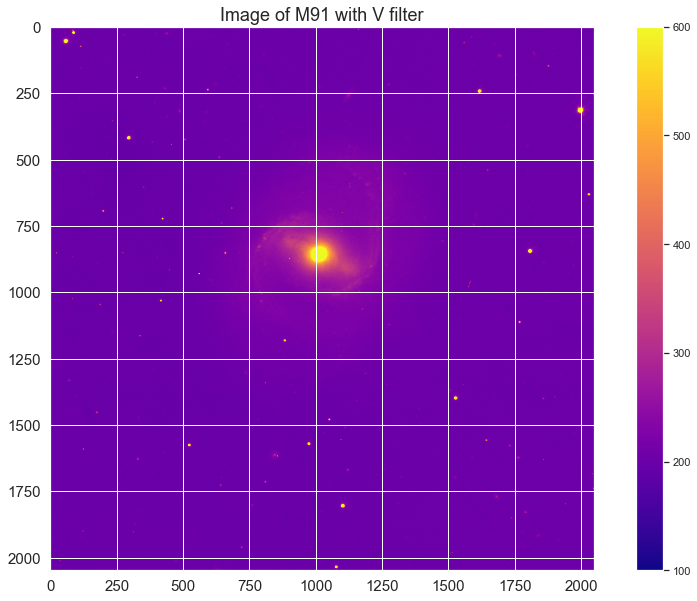

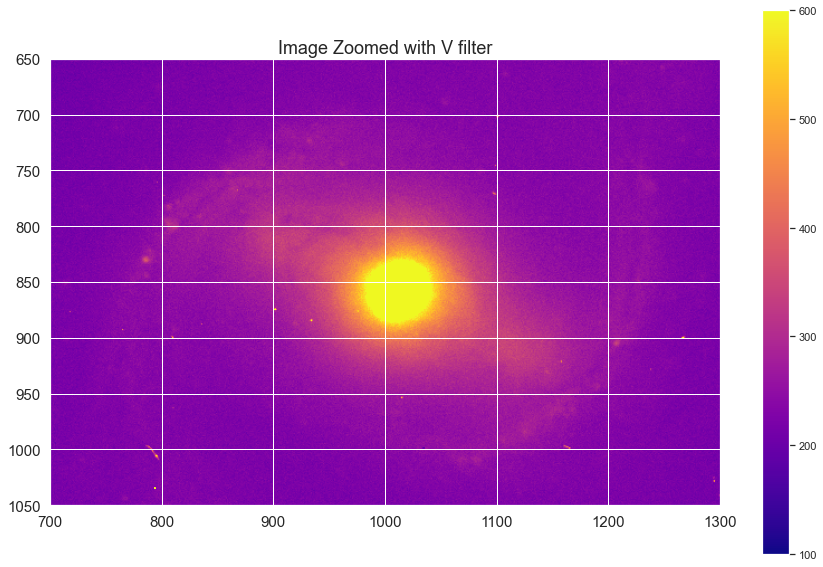

In [19]:
#full image of M91 using V filter
os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/AstroCCDimage/data_2019/data_2019/M91/object/V')
fV = sigmaclip('O130311*')
flatV = np.delete(fV,np.s_[0:50],axis = 1)

imageV = (flatV - masterbias)/nmasterflatV



print(np.mean(imageV))
plt.imshow(imageV, vmax = 600, vmin = 100 ,cmap = 'plasma')
plt.title('Image of M91 with V filter', fontsize = 18)
plt.tick_params(labelsize=15)
plt.colorbar()
os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/AstroCCDimage/images')
plt.savefig('imageV.png')
plt.show()

plt.imshow(imageV, vmax = 600, vmin = 100 ,cmap = 'plasma')
plt.title('Image Zoomed with V filter', fontsize = 18)
plt.xlim(700,1300)
plt.ylim(1050,650)
plt.tick_params(labelsize=15)
plt.colorbar()
plt.savefig('imageVzoom.png')
plt.show()

os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/AstroCCDimage/data_2019/data_2019/M91/object/V')
hdunV= fits.PrimaryHDU(imageV)
hdunVV = fits.HDUList([hdunV])
hdunVV.writeto('imageV.fits', overwrite = True)


417.1039158843815


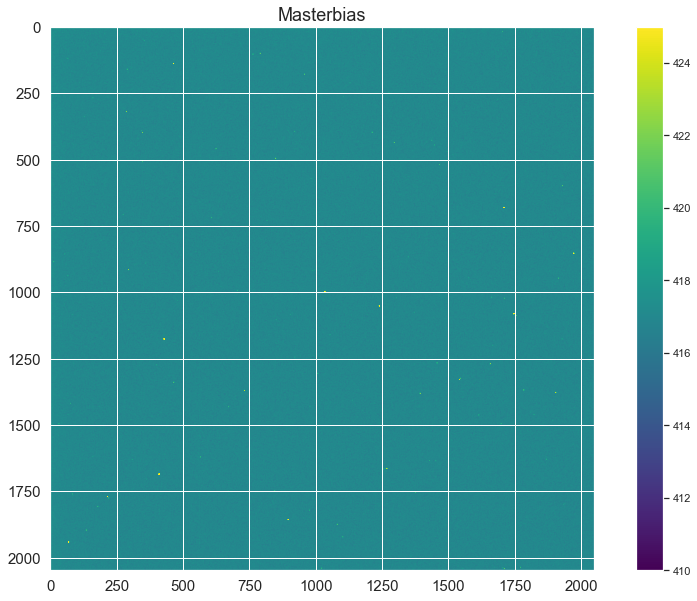

5.916098581192905


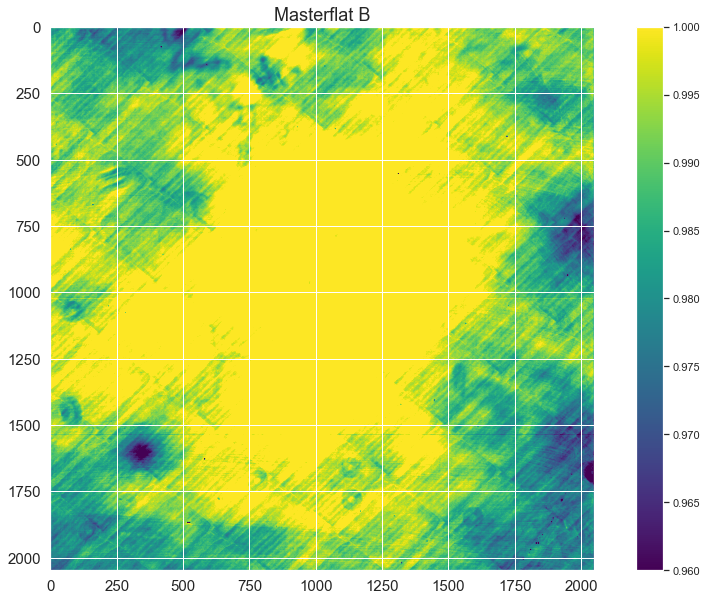

52109.83116883118 489.8040226776107


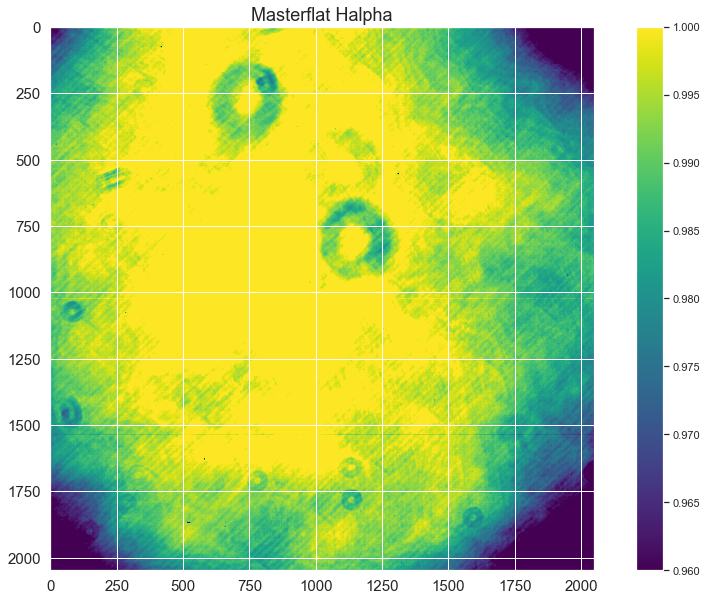

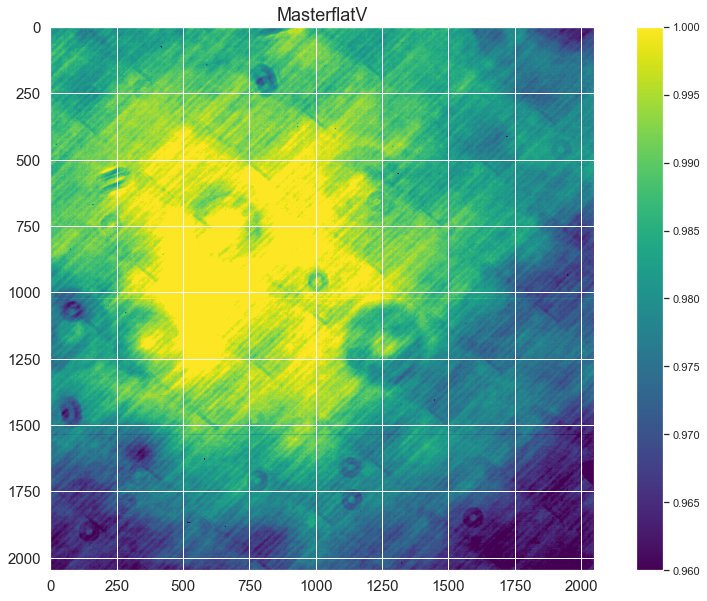

In [20]:
#investigating the difference in the master bias and master flats for each filter
plt.imshow(masterbias, vmax = 425, vmin= 410,  cmap = 'viridis')
plt.title('Masterbias', fontsize = 18)
plt.tick_params(labelsize=15)
plt.colorbar()
os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/AstroCCDimage/images')
plt.savefig('masterbiasM91.png')
plt.show()
print(np.std(masterbias))

plt.imshow(nmasterflatB,vmin = 0.96,vmax = 1, cmap = 'viridis')
plt.title('Masterflat B', fontsize = 18)
plt.tick_params(labelsize=15)
plt.colorbar()
plt.savefig('masterflatBM91.png')
plt.show()
print(np.max(masterflatB),np.std(masterflatB))

plt.imshow(nmasterflatHa,vmin = 0.96,vmax = 1, cmap = 'viridis')
plt.title('Masterflat Halpha', fontsize = 18)
plt.tick_params(labelsize=15)
plt.colorbar()
plt.savefig('masterflatHAM91.png')
plt.show()

plt.imshow(nmasterflatV,vmin = 0.96,vmax = 1, cmap = 'viridis')
plt.title('MasterflatV', fontsize = 18)
plt.tick_params(labelsize=15)
plt.colorbar()
plt.savefig('masterflatVM91.png')
plt.show()

In [21]:
#saving the data to new fits files
os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/AstroCCDimage/data_2019/data_2019/M91/object')
hdun1 = fits.PrimaryHDU(imageB)
hdun2 = fits.HDUList([hdun1])
hdun2.writeto('image_01.fits', overwrite = True)

hdun3 = fits.PrimaryHDU(imageHalpha)
hdun4 = fits.HDUList([hdun3])
hdun4.writeto('image_02.fits', overwrite = True)

hdun5 = fits.PrimaryHDU(imageV)
hdun6 = fits.HDUList([hdun5])
hdun6.writeto('image_03.fits', overwrite = True)

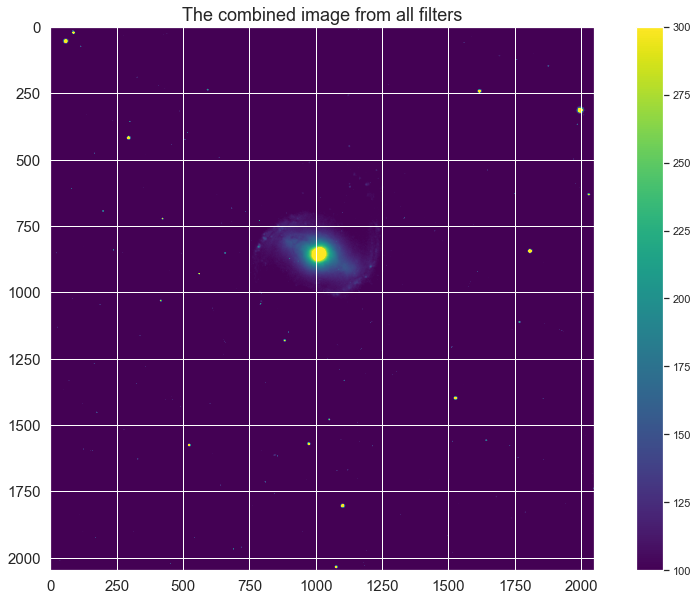

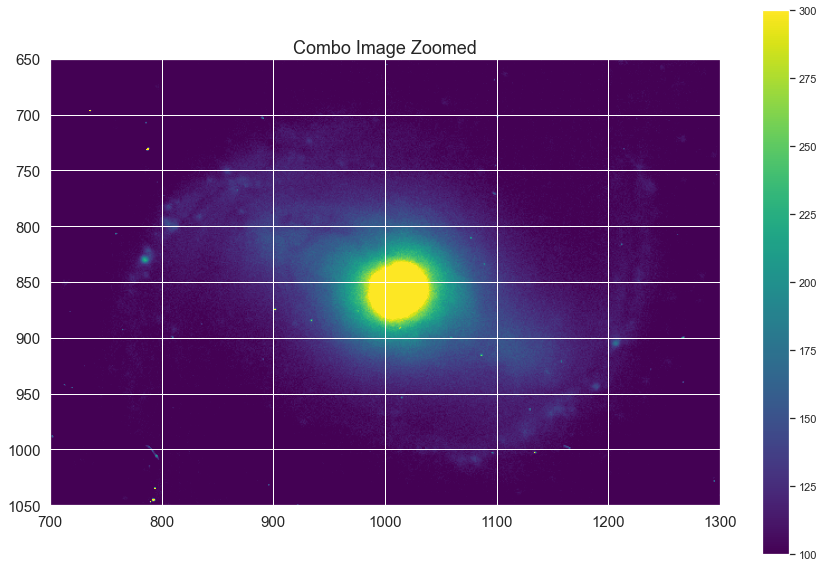

85.1049127129435 50.979509104618145


In [22]:
#now combing all the mages from filters to create one image
imagecomb = sigmaclip('image*')
plt.imshow(imagecomb, vmax = 300, vmin= 100,  cmap = 'viridis')
plt.title('The combined image from all filters', fontsize = 18)
plt.tick_params(labelsize=15)
plt.colorbar()
os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/AstroCCDimage/images')
plt.savefig('masterimageM91.png')
plt.show()

plt.imshow(imagecomb, vmax = 300, vmin = 100 ,cmap = 'viridis')
plt.title('Combo Image Zoomed', fontsize = 18)
plt.xlim(700,1300)
plt.ylim(1050,650)
plt.tick_params(labelsize=15)
plt.colorbar()
plt.savefig('masterimagezoomM91.png')
plt.show()

os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/AstroCCDimage/data_2019/data_2019/M91/object')
hdunc = fits.PrimaryHDU(imagecomb)
hduncc = fits.HDUList([hdunc])
hduncc.writeto('combo.fits', overwrite = True)
print(np.mean(imagecomb),np.std(imagecomb))

In [23]:
#reducing image to include the brigtest points in the image
def reduce(im, x,y,a,b):

    image = (fits.open(im)[0].data)
    
    small = (image[x:y,a:b]).astype(float)
    m = np.mean(small)
    print(m)

    

    data = np.array(image.flatten())
    sigma = np.std(data)
    print(sigma)
    newdat = []
    for i in data:
        if i > m + sigma/5:
            x = i
            newdat.append(x)
        else:
            x = 0
            newdat.append(x)

    array = np.array(newdat)

    newimage = array.reshape(2048, 2048)

    return newimage
        
     



81.58779760045705
50.979509104618145


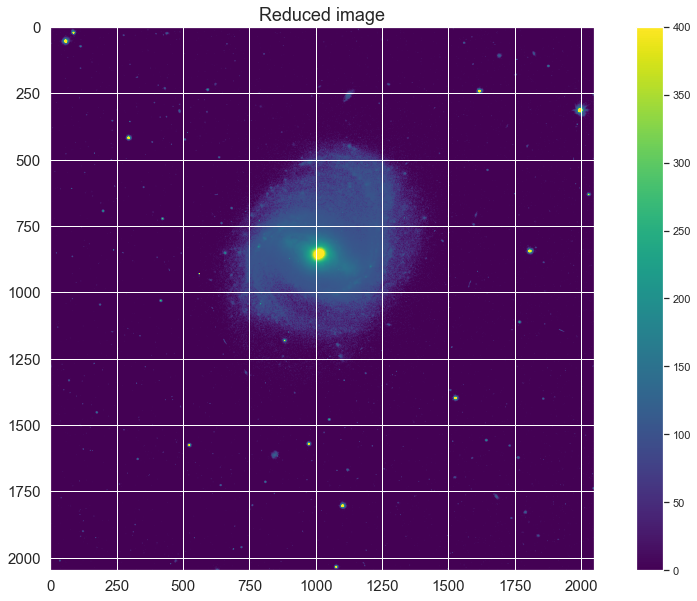

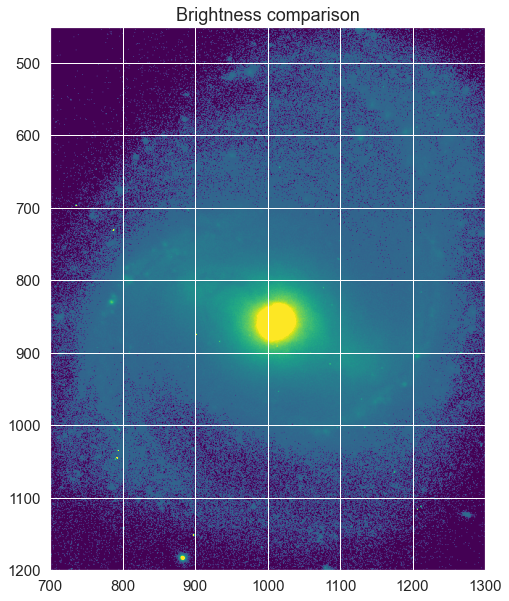

24252.973337990858


In [24]:

#finding the brightest sources
newimage = reduce('combo.fits',1500,1600,0,100)
plt.imshow(newimage, vmax = 400, vmin= 0,  cmap = 'viridis')
plt.title('Reduced image', fontsize = 18)
plt.tick_params(labelsize=15)
plt.colorbar()
os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/AstroCCDimage/images')
plt.savefig('masterimageM91reduced.png')
plt.show()

plt.imshow(newimage, vmax = 300, vmin = 0 ,cmap = 'viridis')
plt.title('Brightness comparison', fontsize = 18)
plt.xlim(700,1300)
plt.ylim(1200,450)
plt.tick_params(labelsize=15)
plt.savefig('masterimageM91reduced.png')
plt.show()

print(np.max(newimage))

os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/AstroCCDimage/data_2019/data_2019/M91/object')
hdunn = fits.PrimaryHDU(newimage)
hdunnn = fits.HDUList([hdunn])
hdunnn.writeto('brightsource.fits', overwrite = True)

In [25]:
#pricks out the very brigtest stars at the centre of the galaxy
def reduce2(im, x,y,a,b):

    image = (fits.open(im)[0].data)
    
    small = (image[x:y,a:b]).astype(float)
    m = np.mean(small)
    print(m)

    

    data = np.array(image.flatten())
    sigma = np.std(data)
    print(sigma)
    newdat = []
    for i in data:
        if i > m + 2*sigma:
            x = i
            newdat.append(x)
        else:
            x = 0
            newdat.append(x)

    array = np.array(newdat)

    newimage = array.reshape(2048, 2048)

    return newimage

81.58779760045705
50.979509104618145


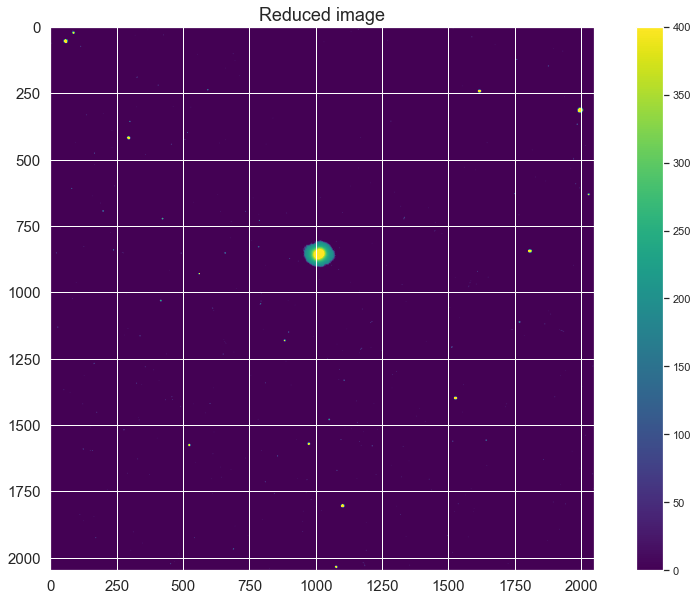

In [26]:
newimage2 = reduce2('combo.fits',1500,1600,0,100)
plt.imshow(newimage2, vmax = 400, vmin= 0,  cmap = 'viridis')
plt.title('Reduced image', fontsize = 18)
plt.tick_params(labelsize=15)
plt.colorbar()
hduncen = fits.PrimaryHDU(newimage2)
hduncene = fits.HDUList([hduncen])
hduncene.writeto('galacticcent.fits', overwrite = True)
plt.show()

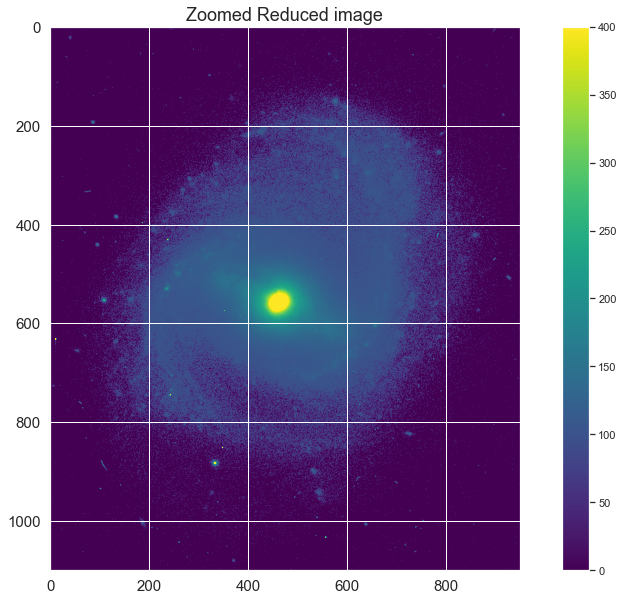

(1100, 950)


In [27]:
zoom = fits.open('brightsource.fits')[0].data[300:1400,550:1500]
plt.imshow(zoom, vmax = 400, vmin= 0,  cmap = 'viridis')
plt.title('Zoomed Reduced image', fontsize = 18)
plt.tick_params(labelsize=15)
plt.colorbar()
plt.show()  

print(np.shape(zoom))
hdunz = fits.PrimaryHDU(zoom)
hdunzz= fits.HDUList([hdunz])
hdunzz.writeto('brightzoom.fits', overwrite = True)

centre= fits.open('galacticcent.fits')[0].data[300:1400,550:1500]

In [28]:
l = np.array([[1,2],[3,4]])
print(l[0][1])

2


In [29]:
#creating a plot to plot all brightest sources
def plot(data):
    x = []
    y = []
    j = 0
    
    while j < np.shape(data)[1]:
        i = 0
        
        while i < np.shape(data)[0]:
            
            dat = data[i][j]
            
            if dat > 0:
                x.append(j)
                y.append(i)
                i += 1
            else:
                i+=1
        j +=1
        
    return np.array(x), np.array(y) 

In [30]:
x,y  = plot(zoom)

x1,y1 = plot(centre)


-0.4222222222222222
754.2222222222222


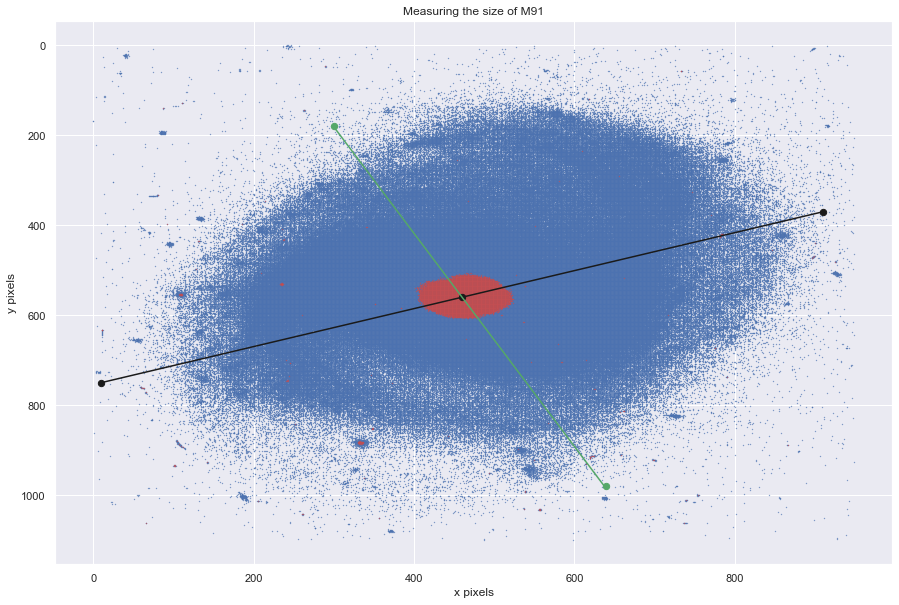

In [31]:

#scatter plot of all data 
plt.scatter(x,y, s = .1)
plt.scatter(x1,y1,s=.1,color = 'r')



plt.title('Measuring the size of M91')
plt.xlabel('x pixels')
plt.ylabel('y pixels')

plt.scatter(460,560,s = 40, color = 'k')
plt.scatter(10,750,s = 40, color = 'k')
plt.scatter(910,370,s = 40, color = 'k')
plt.plot([10,460,910],[750,560,370],color='k')

#drawing lines in order to calculate the semi major and minor axis
m = (370-750)/(910-10)
c = 560 -m*460

m2 = -1/(m)
c2 = 560 -m2*460
print(m)
print(c)
x2 = np.linspace(300,640,100)
y2 = m2*x2+c2

plt.plot(x2,y2,color = 'g')
plt.scatter(300,180,s=40,color='g')
plt.scatter(640,980,s=40,color='g')

plt.gca().invert_yaxis()
os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/AstroCCDimage/images')
plt.savefig('M19scatter.png')
plt.show()

In [32]:
def semimajor(ar1,ar2):
    count= 0
    
    i = 0
    m = (370-750)/(910-10)
    c = 560 -m*460

    xnew = []
    ynew = []
    while i < len(ar1):
        x = ar1[i]
        y = ar2[i]
    

        if m*x+c -0.5<= y <= m*x+c +0.5:
            xnew.append(x)
            ynew.append(y)
        
            
            count += 1
            i +=1
        else:
            i +=1
    
    return count , np.array(xnew), np.array(ynew)

def semiminor(ar1,ar2):
    count= 0
    
    m = -1/((370-750)/(910-10))
    c = 560 -m*460
    i = 0
    xnew = []
    ynew = []
    while i < len(ar1):
        x = ar1[i]
        y = ar2[i]
    

        if m*x+c -0.5<= y <= m*x+c +0.5:
            xnew.append(x)
            ynew.append(y)
        
            
            count += 1
            i +=1
        else:
            i +=1
    
    return count , np.array(xnew), np.array(ynew)


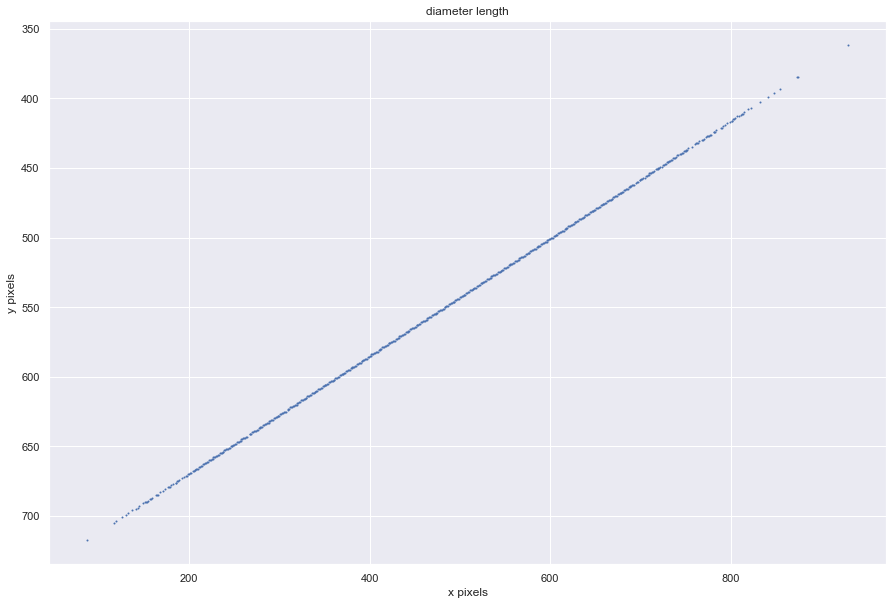

914.6988575482097
arcseconds: 278.0684526946558
arcminutes: 4.634483480526019 +/- 0.0025333383999999997


In [35]:

#counting all pixels along semi magjor and minor axis
count ,x2,y2 = semimajor(x,y)
plt.scatter(x2,y2,s = 1)
plt.title('diameter length')
plt.xlabel('x pixels')
plt.ylabel('y pixels')
plt.gca().invert_yaxis()

plt.savefig('M19scatterdiameter.png')
plt.show()

actcount= np.sqrt((np.max(x2)-np.min(x2))**2+(np.max(y2)-np.min(y2))**2)

print(actcount)
arc = actcount*0.304
unc = 0.5*0.304
print('arcseconds:',arc)
print('arcminutes:',arc*0.0166667, '+/-', unc*0.0166667)

rads = arc*1/60 *(np.pi)/180
dist = (arc/20625)*(4.62851637e+23)



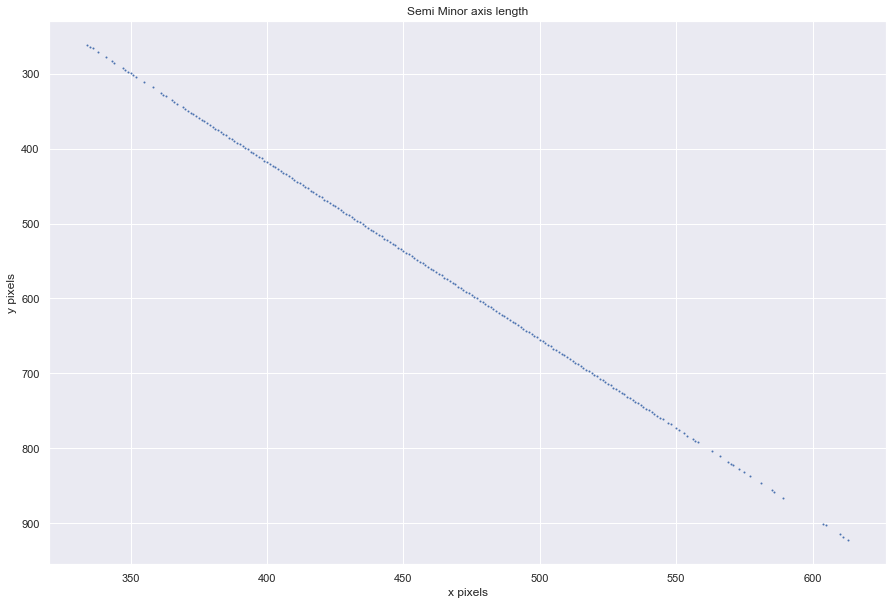

224
716.5479746674329
arcseconds: 217.8305842988996
arcminutes: 3.63051699933447 +/- 0.00050666768


In [34]:
count1 ,x2,y2 = semiminor(x,y)
plt.scatter(x2,y2,s = 1)
plt.title('Semi Minor axis length')
plt.xlabel('x pixels')
plt.ylabel('y pixels')
plt.gca().invert_yaxis()

plt.savefig('M19scattersemiminor.png')
plt.show()
print(count1)
actcount2 = np.sqrt((np.max(x2)-np.min(x2))**2+(np.max(y2)-np.min(y2))**2)
print(actcount2)
arc2 = actcount2*0.304
unc2 = 0.5*0.304
print('arcseconds:',arc2)
print('arcminutes:',arc2*0.0166667, '+/-', unc2*0.0166667)